In [2]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings

In [3]:
crop_yield = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Github\Univelcity_Capstone\data\Digital Green Crop Yield Estimate Challenge\dataset.csv")
crop_yield.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [4]:
crop_yield.shape

(3870, 44)

In [5]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [6]:
crop_yield.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [16]:
# Check for missing values
missing_values = crop_yield.isnull().sum()

# Get the dtypes of each column
column_dtypes = crop_yield.dtypes

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(crop_yield)) * 100

# Create a DataFrame with missing values and dtypes
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage,
    "Dtype": column_dtypes
})

missing_df.style.format({"Percentage": "{:.2f}%"})


,Missing Values,Percentage,Dtype
ID,0,0.00%,object
District,0,0.00%,object
Block,0,0.00%,object
CultLand,0,0.00%,int64
CropCultLand,0,0.00%,int64
LandPreparationMethod,0,0.00%,object
CropTillageDate,0,0.00%,object
CropTillageDepth,0,0.00%,int64
CropEstMethod,0,0.00%,object
RcNursEstDate,83,2.14%,object


In [8]:
# Set the threshold percentage
threshold = 30
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(crop_yield)) * 100

# Get the columns to drop
columns_to_drop = missing_percentage[missing_percentage >= threshold].index.tolist()

In [9]:
crop = crop_yield.copy()
crop = crop.drop(columns_to_drop, axis=1)
crop.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,NoFertilizerAppln,CropbasalFerts,BasalDAP,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,2,Urea,NaN,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,2,DAP Urea,15.0,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,2,DAP,4.0,SoilApplied,Urea,5.0,65.0,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,2,DAP Urea,6.0,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,2,Urea DAP,15.0,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [17]:
# Check for missing values
missing_values = crop.isnull().sum()

# Get the dtypes of each column
column_dtypes = crop.dtypes

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(crop)) * 100

# Create a DataFrame with missing values and dtypes
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage,
    "Dtype": column_dtypes
})

missing_df.style.format({"Percentage": "{:.2f}%"})


,Missing Values,Percentage,Dtype
ID,0,0.00%,object
District,0,0.00%,object
Block,0,0.00%,object
CultLand,0,0.00%,int64
CropCultLand,0,0.00%,int64
LandPreparationMethod,0,0.00%,object
CropTillageDate,0,0.00%,object
CropTillageDepth,0,0.00%,int64
CropEstMethod,0,0.00%,object
RcNursEstDate,83,2.14%,object


In [18]:
crop.shape

(3870, 37)

In [19]:
crop_c = crop.dropna()

In [20]:
crop_c.shape

(2535, 37)

In [10]:
crop.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,3870.000000,3327.000000,3314.000000,3314.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,2.184496,11.452359,11.513881,29.200362,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,0.634632,8.422049,8.715856,12.139109,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,2.000000,6.000000,6.000000,23.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,2.000000,10.000000,10.000000,28.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,3.000000,15.000000,15.000000,36.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,4.000000,100.000000,90.000000,332.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [21]:
crop_cl = crop.fillna(crop.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_3196\3630262805.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_cl = crop.fillna(crop.mean())


In [22]:
crop_cl.shape

(3870, 37)

In [14]:
crop_cl.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,2.184496,11.452359,11.513881,29.200362,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.334114,41.536040,368.793161,2.138309,0.634632,7.808714,8.065317,11.233062,1100.908799,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,180.000000,2.000000,2.000000,6.000000,6.000000,25.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,379.726908,3.000000,2.000000,10.000000,10.000000,29.200362,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,400.000000,4.000000,3.000000,13.750000,15.000000,35.000000,600.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,4.000000,100.000000,90.000000,332.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [23]:
crop_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 3869
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2535 non-null   object 
 1   District                            2535 non-null   object 
 2   Block                               2535 non-null   object 
 3   CultLand                            2535 non-null   int64  
 4   CropCultLand                        2535 non-null   int64  
 5   LandPreparationMethod               2535 non-null   object 
 6   CropTillageDate                     2535 non-null   object 
 7   CropTillageDepth                    2535 non-null   int64  
 8   CropEstMethod                       2535 non-null   object 
 9   RcNursEstDate                       2535 non-null   object 
 10  SeedingSowingTransplanting          2535 non-null   object 
 11  SeedlingsPerPit                     2535 no

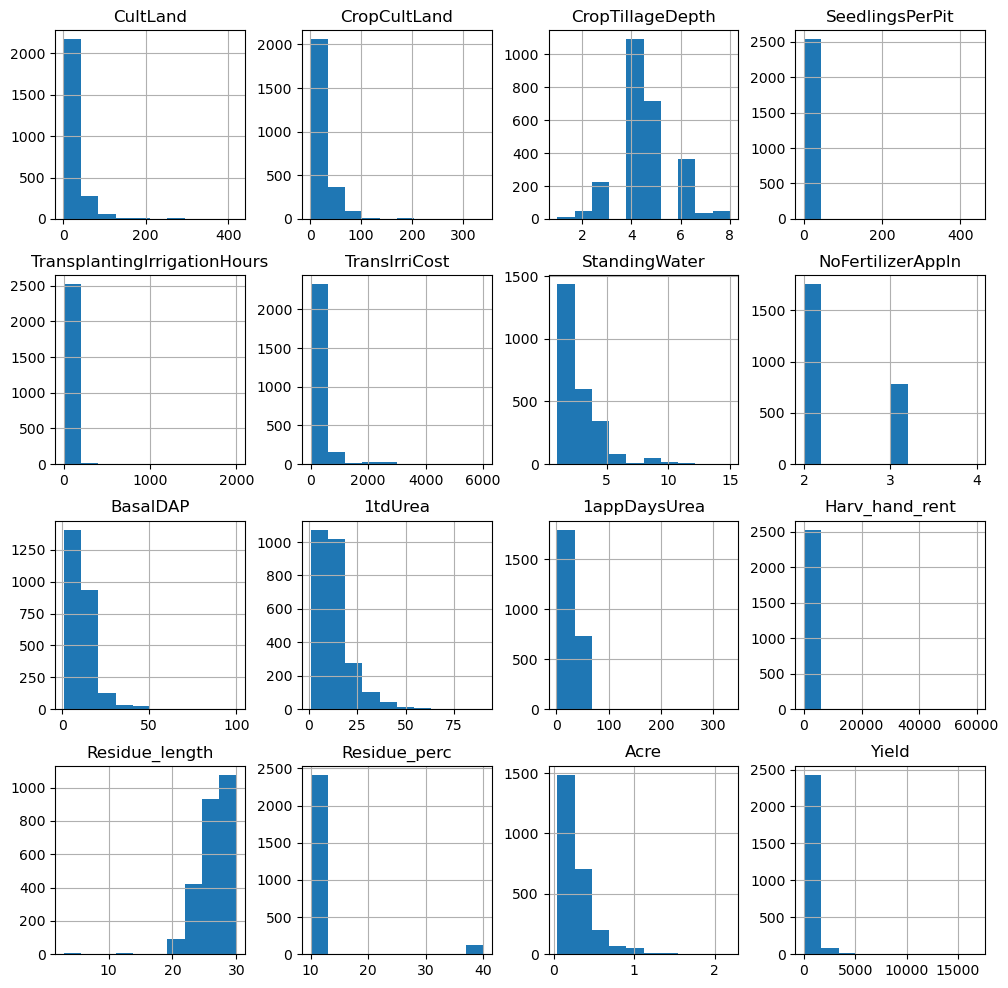

In [24]:
crop_c.hist(figsize=(12,12))
pyplot.show()

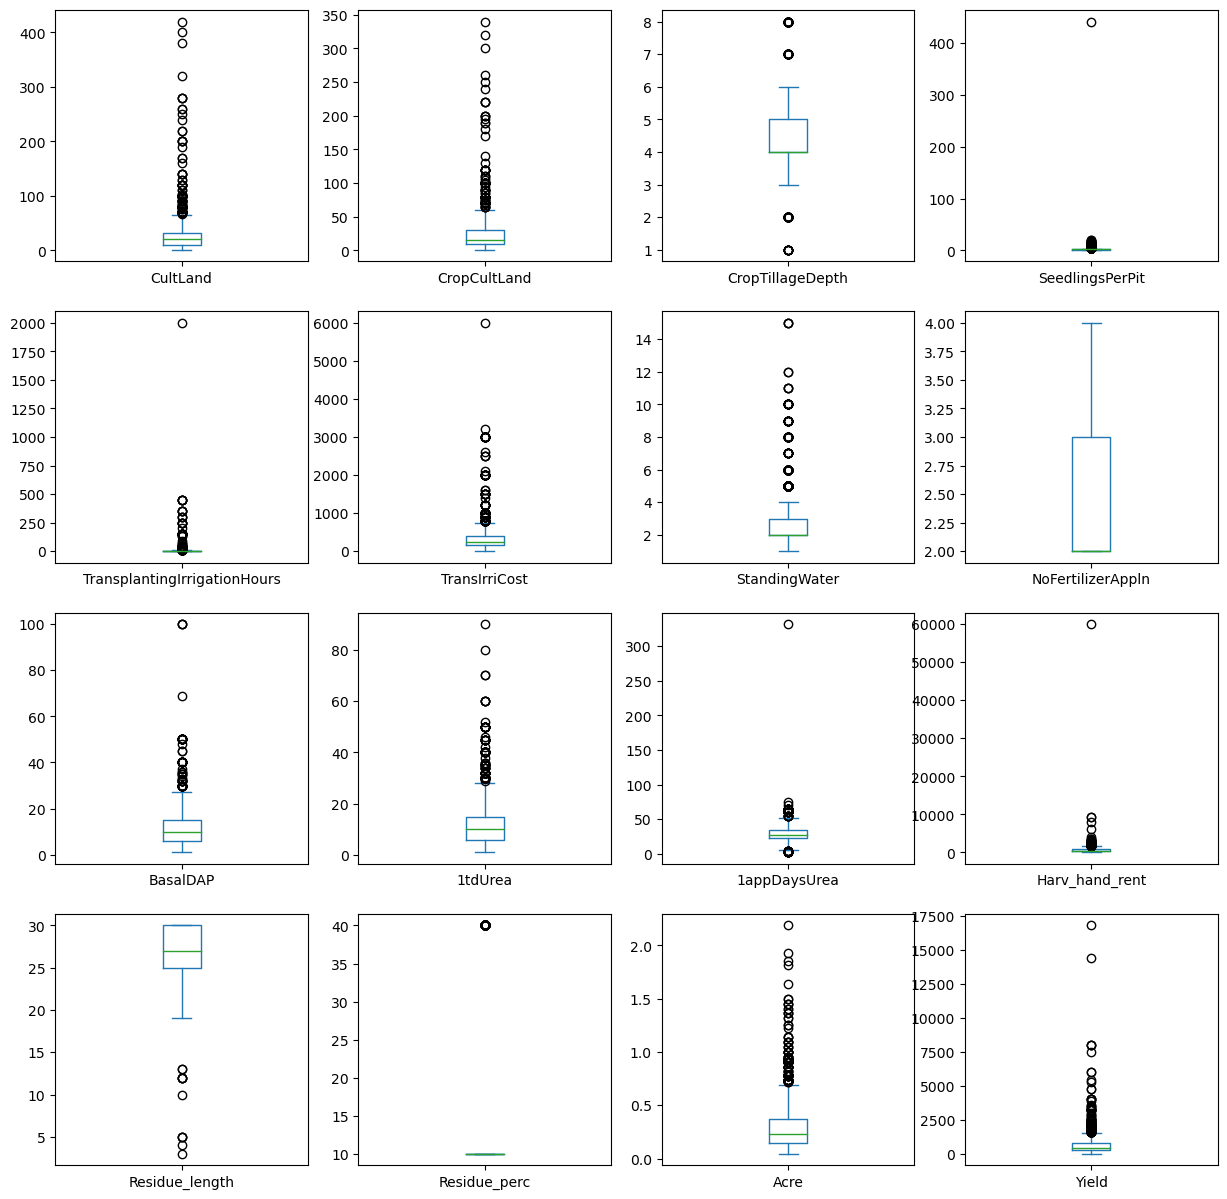

In [27]:
crop_c.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()